In [26]:
!pip install scikit-optimize

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay, auc, log_loss, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

from imblearn import FunctionSampler
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.pipeline import make_pipeline, Pipeline

from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

from sklearn.linear_model import LogisticRegression

In [28]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Persiapan

In [29]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/1. Telco Customer Churn/Data/TelcoChurn_prep.csv")

In [30]:
df

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Gender Male,Is SeniorCitizen,Have Partner,Have Dependents,Have PhoneService,...,Not have StreamingTV,Have StreamingTV,Not have StreamingMovies,Have StreamingMovies,One year,Two year,Have PaperlessBilling,Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,No,0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,No,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,Yes,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
3,7795-CFOCW,0.512486,-0.747850,-0.195248,No,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
4,9237-HQITU,-1.239504,0.196178,-0.940457,Yes,0,0,0,0,1,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,-0.343137,0.664868,-0.129180,No,1,0,1,1,1,...,0,1,0,1,1,0,1,0,0,1
7028,2234-XADUH,1.612573,1.276493,2.241056,No,0,0,1,1,1,...,0,1,0,1,1,0,1,1,0,0
7029,4801-JZAZL,-0.872808,-1.170004,-0.854514,No,0,0,1,1,0,...,1,0,1,0,0,0,1,0,1,0
7030,8361-LTMKD,-1.158016,0.319168,-0.872095,Yes,1,1,1,0,1,...,1,0,1,0,0,0,1,0,0,1


In [31]:
df = df.drop(["customerID"],axis=1)

In [32]:
df

,tenure,MonthlyCharges,TotalCharges,Churn,Gender Male,Is SeniorCitizen,Have Partner,Have Dependents,Have PhoneService,Not Have MultipleLines,...,Not have StreamingTV,Have StreamingTV,Not have StreamingMovies,Have StreamingMovies,One year,Two year,Have PaperlessBilling,Credit card (automatic),Electronic check,Mailed check
0,-1.280248,-1.161694,-0.994194,No,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
1,0.064303,-0.260878,-0.173740,No,1,0,0,0,1,1,...,1,0,1,0,1,0,0,0,0,1
2,-1.239504,-0.363923,-0.959649,Yes,1,0,0,0,1,1,...,1,0,1,0,0,0,1,0,0,1
3,0.512486,-0.747850,-0.195248,No,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
4,-1.239504,0.196178,-0.940457,Yes,0,0,0,0,1,1,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,No,1,0,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7028,1.612573,1.276493,2.241056,No,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7029,-0.872808,-1.170004,-0.854514,No,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
7030,-1.158016,0.319168,-0.872095,Yes,1,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1


In [33]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

In [34]:
df

,tenure,MonthlyCharges,TotalCharges,Churn,Gender Male,Is SeniorCitizen,Have Partner,Have Dependents,Have PhoneService,Not Have MultipleLines,...,Not have StreamingTV,Have StreamingTV,Not have StreamingMovies,Have StreamingMovies,One year,Two year,Have PaperlessBilling,Credit card (automatic),Electronic check,Mailed check
0,-1.280248,-1.161694,-0.994194,0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
1,0.064303,-0.260878,-0.173740,0,1,0,0,0,1,1,...,1,0,1,0,1,0,0,0,0,1
2,-1.239504,-0.363923,-0.959649,1,1,0,0,0,1,1,...,1,0,1,0,0,0,1,0,0,1
3,0.512486,-0.747850,-0.195248,0,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
4,-1.239504,0.196178,-0.940457,1,0,0,0,0,1,1,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0,1,0,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7028,1.612573,1.276493,2.241056,0,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7029,-0.872808,-1.170004,-0.854514,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
7030,-1.158016,0.319168,-0.872095,1,1,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1


In [35]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

# SMOTE

In [36]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_sm, y_train_sm)

In [37]:
X_train_res

,tenure,MonthlyCharges,TotalCharges,Gender Male,Is SeniorCitizen,Have Partner,Have Dependents,Have PhoneService,Not Have MultipleLines,Have MultipleLines,...,Not have StreamingTV,Have StreamingTV,Not have StreamingMovies,Have StreamingMovies,One year,Two year,Have PaperlessBilling,Credit card (automatic),Electronic check,Mailed check
0,-0.954296,-0.209355,-0.769188,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,-0.261649,-0.107972,-0.309427,1,0,0,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
2,-1.198760,0.171248,-0.910104,0,0,0,0,1,1,0,...,0,1,0,1,1,0,1,0,1,0
3,-1.035784,0.292575,-0.777946,1,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,1,0
4,1.408853,-0.146198,0.736959,1,0,1,1,1,1,0,...,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7223,-1.124642,0.471256,-0.839406,1,0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
7224,-0.880028,0.314141,-0.654134,1,0,0,0,1,1,0,...,1,0,1,0,0,0,1,0,1,0
7225,0.999078,1.352067,1.645977,1,0,0,0,1,0,0,...,0,1,0,1,1,0,1,1,0,0
7226,-1.071851,0.457900,-0.810266,0,0,0,0,1,0,1,...,1,0,1,0,0,0,1,0,1,0


In [38]:
X_test_sm

,tenure,MonthlyCharges,TotalCharges,Gender Male,Is SeniorCitizen,Have Partner,Have Dependents,Have PhoneService,Not Have MultipleLines,Have MultipleLines,...,Not have StreamingTV,Have StreamingTV,Not have StreamingMovies,Have StreamingMovies,One year,Two year,Have PaperlessBilling,Credit card (automatic),Electronic check,Mailed check
2476,1.164390,-1.322910,-0.344810,1,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
6773,-0.546857,-1.332882,-0.801836,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6116,-0.791321,1.244914,-0.407790,1,0,1,0,1,0,1,...,0,1,0,1,0,0,1,1,0,0
3047,0.186535,-0.324035,-0.111422,1,0,1,0,1,0,1,...,1,0,1,0,0,0,1,0,0,1
4092,-1.076528,-1.174990,-0.936134,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,1.286622,0.540217,1.258289,1,0,1,1,1,1,0,...,1,0,1,0,0,0,0,0,1,0
6737,0.797694,-0.975547,-0.143099,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1695,0.593974,-1.474154,-0.591324,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1095,-1.117272,-0.302428,-0.892920,1,0,1,1,1,0,1,...,1,0,1,0,0,0,1,0,0,1


# Feature Selection

In [39]:
selector = SelectKBest(score_func=f_classif, k=10)
X_train_res_sel = selector.fit_transform(X_train_res, y_train_res)
X_test_sel = selector.transform(X_test_sm)

In [40]:
selected_features = selector.get_feature_names_out(input_features=X.columns)

X_train_res_sel_df = pd.DataFrame(X_train_res_sel, columns=selected_features)
X_test_sel_df = pd.DataFrame(X_test_sel, columns=selected_features)

In [41]:
X_train_res_sel_df

,tenure,Have Dependents,Using Fiber optic as InternetService,Not Have OnlineSecurity,Not Have OnlineBackup,Not Have DeviceProtection,Not have TechSupport,One year,Two year,Electronic check
0,-0.954296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.261649,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,-1.198760,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
3,-1.035784,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,1.408853,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7223,-1.124642,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7224,-0.880028,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
7225,0.999078,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7226,-1.071851,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [42]:
X_test_sel_df

,tenure,Have Dependents,Using Fiber optic as InternetService,Not Have OnlineSecurity,Not Have OnlineBackup,Not Have DeviceProtection,Not have TechSupport,One year,Two year,Electronic check
0,1.164390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.546857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.791321,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.186535,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,-1.076528,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2105,1.286622,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2106,0.797694,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2107,0.593974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2108,-1.117272,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


# Dimenctional reduction

In [43]:
pca = PCA(n_components=5)
X_train_res_pca = pca.fit_transform(X_train_res_sel)
X_test_pca = pca.transform(X_test_sel)

In [44]:
X_train_res_pca

array([[-0.27851706,  1.17067329,  0.08784308,  0.52363911, -0.53837728],
       [-0.03506223,  0.16447002, -0.14864864, -0.58837524,  0.86352179],
       [-1.03223672,  0.26014688, -0.41233551,  0.44596008, -0.11608359],
       ...,
       [ 1.28975433, -0.31892402,  0.14707086, -0.9637795 , -0.02296851],
       [-1.14379706, -0.1595713 , -0.06885689,  0.16597034,  0.30471827],
       [-0.5106258 ,  0.42512176,  0.70760096,  0.11332071, -0.19086417]])

In [45]:
X_test_pca

array([[ 1.89499432,  0.3380133 ,  0.01201274,  0.12738173, -0.10316275],
       [ 0.28898133,  1.183278  , -0.29875379, -0.16912789, -0.23261251],
       [-0.74198316, -0.17124525, -0.0591963 ,  0.17189233, -0.94440264],
       ...,
       [ 1.43320932,  0.63152123, -0.0603292 ,  0.11674912, -0.12433972],
       [-0.75931229,  0.76780008,  0.81907818,  0.32827833,  0.22124225],
       [ 1.10842653, -1.15032953, -0.51849323,  0.44413213, -0.35174848]])

In [46]:
X_train_res_pca_df = pd.DataFrame(X_train_res_pca, columns=[f'PC{i+1}' for i in range(X_train_res_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

In [47]:
X_train_res_pca_df

,PC1,PC2,PC3,PC4,PC5
0,-0.278517,1.170673,0.087843,0.523639,-0.538377
1,-0.035062,0.164470,-0.148649,-0.588375,0.863522
2,-1.032237,0.260147,-0.412336,0.445960,-0.116084
3,-1.350494,-0.557144,-0.064664,0.134455,0.147250
4,1.977309,0.097006,0.650843,1.055794,0.044383
...,...,...,...,...,...
7223,-0.767772,0.373978,-0.228486,0.302900,-0.994111
7224,-0.986749,-0.415035,-0.483180,-0.563004,0.443671
7225,1.289754,-0.318924,0.147071,-0.963780,-0.022969
7226,-1.143797,-0.159571,-0.068857,0.165970,0.304718


In [48]:
X_test_pca_df

,PC1,PC2,PC3,PC4,PC5
0,1.894994,0.338013,0.012013,0.127382,-0.103163
1,0.288981,1.183278,-0.298754,-0.169128,-0.232613
2,-0.741983,-0.171245,-0.059196,0.171892,-0.944403
3,0.165979,-0.004808,0.942272,0.024055,0.036679
4,-0.856545,0.645103,0.782087,0.000511,-0.010213
...,...,...,...,...,...
2105,1.125236,-1.043838,-0.038460,-0.266935,1.112025
2106,0.995490,-0.091182,0.398434,0.164613,-0.488516
2107,1.433209,0.631521,-0.060329,0.116749,-0.124340
2108,-0.759312,0.767800,0.819078,0.328278,0.221242


# Baseline model logistic lienar

In [49]:
model = LogisticRegression()
model.fit(X_train_res_pca_df, y_train_res)

LogisticRegression()

In [52]:
y_pred = model.predict(X_test_pca_df)

print("Recall:", recall_score(y_test_sm, y_pred))
print("F1-score:", f1_score(y_test_sm, y_pred))
print("Confusion matriks: \n",confusion_matrix(y_test_sm, y_pred))
print(classification_report(y_test_sm, y_pred))

Recall: 0.7557932263814616
F1-score: 0.6140477914554671
Confusion matriks: 
 [[1153  396]
 [ 137  424]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1549
           1       0.52      0.76      0.61       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.71      2110
weighted avg       0.79      0.75      0.76      2110



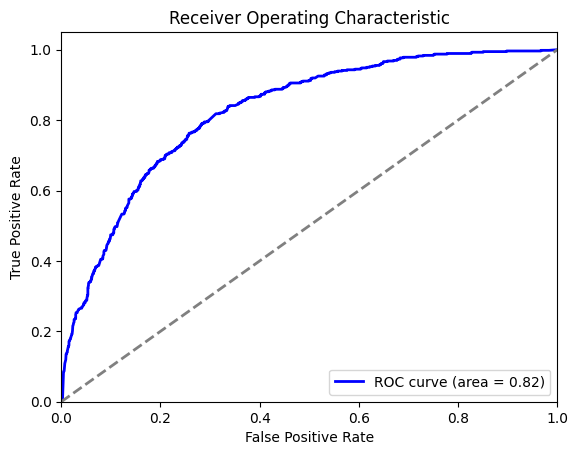

In [60]:
y_pred_proba = model.predict_proba(X_test_pca_df)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_sm, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

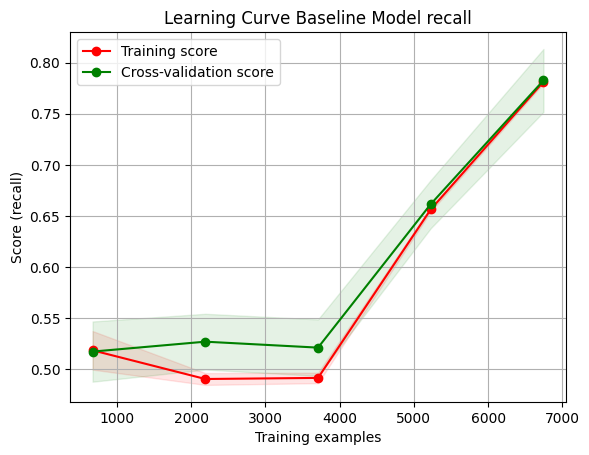

In [58]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(model, X_train_res_pca_df, y_train_res, cv=cv, scoring='recall')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Baseline Model recall")
plt.xlabel("Training examples")
plt.ylabel("Score (recall)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

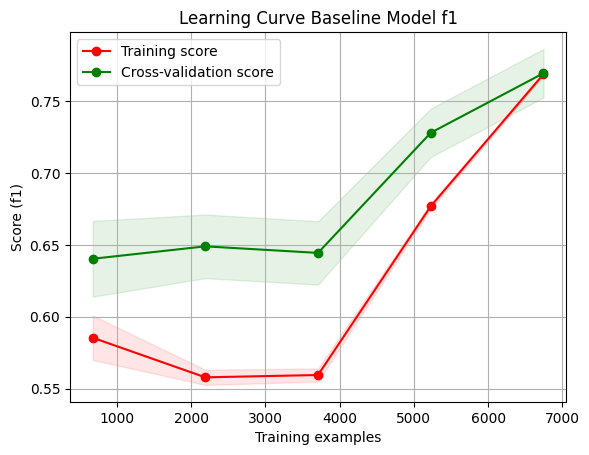

In [57]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(model, X_train_res_pca_df, y_train_res, cv=cv, scoring='f1')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Baseline Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (f1)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Hyperparameter Tunning

In [61]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [62]:
grid_search = GridSearchCV(estimator=LogisticRegression(),
                           param_grid=param_grid,
                           cv=cv,
                           scoring='recall',
                           n_jobs=-1)

In [63]:
grid_search.fit(X_train_res_pca_df, y_train_res)

GridSearchCV(cv=StratifiedKFold(n_splits=15, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='recall')

In [64]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [65]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca_df)

print("Recall:", recall_score(y_test_sm, y_pred))
print("F1-score:", f1_score(y_test_sm, y_pred))
print("Confusion matriks: \n",confusion_matrix(y_test_sm, y_pred))
print(classification_report(y_test_sm, y_pred))

Recall: 0.7718360071301248
F1-score: 0.5792642140468227
Confusion matriks: 
 [[1048  501]
 [ 128  433]]
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1549
           1       0.46      0.77      0.58       561

    accuracy                           0.70      2110
   macro avg       0.68      0.72      0.67      2110
weighted avg       0.78      0.70      0.72      2110



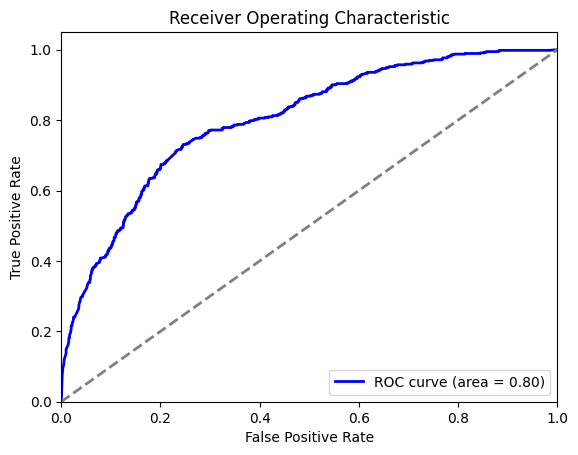

In [66]:
y_pred_proba = best_model.predict_proba(X_test_pca_df)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_sm, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

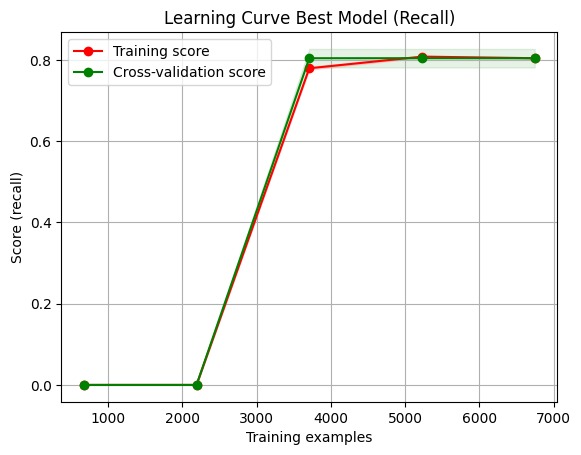

In [67]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_res_pca_df, y_train_res, cv=cv, scoring='recall')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Best Model (Recall)")
plt.xlabel("Training examples")
plt.ylabel("Score (recall)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()